# Decision Trees

# Agenda

1. FSM and Metric Discussion
2. Decision Trees at a High Level
3. ASM (Attribute Selection Methods): Entropy/Information Gain and Gini
4. Issues with Decision Trees: Overfitting, sensitivity to training data, greediness
5. Feature Importances
6. Grid Search

# Discussion Question

What effect does L1 lasso penalty have on model coefficients?  
What effect does L2 ridge penalty have on model coefficients?

In [75]:
from src.student_caller import one_random_student, three_random_students
from src.student_list import student_first_names
one_random_student(student_first_names)

Sindhu


In [77]:
import pandas as pd
import numpy as np

# This is always a good idea
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# 1. FSM and Metric Discussion

In [79]:
# import requests
# import json

# response = requests.get('https://data.austintexas.gov/resource/9t4d-g238.json')
# animal_shelter = pd.DataFrame(response.json())

In [80]:
# Let's return to our Austin Animal shelter data.

animal_shelter = pd.read_csv('data/austin.csv')
animal_shelter.set_index('Unnamed: 0', inplace=True)

In [81]:
# We will convert the original dataframe shown below.
animal_shelter.head()

animal_id                 datetime                monthyear  \
Unnamed: 0                                                               
0            A819400  2020-06-28T08:22:00.000  2020-06-28T08:22:00.000   
1            A819025  2020-06-27T15:26:00.000  2020-06-27T15:26:00.000   
2            A818693  2020-06-27T14:21:00.000  2020-06-27T14:21:00.000   
3            A809756  2020-06-27T12:43:00.000  2020-06-27T12:43:00.000   
4            A819382  2020-06-27T10:19:00.000  2020-06-27T10:19:00.000   

                      date_of_birth outcome_type outcome_subtype animal_type  \
Unnamed: 0                                                                     
0           2018-06-27T00:00:00.000   Euthanasia       Suffering       Other   
1           2020-05-12T00:00:00.000         Died       In Foster         Cat   
2           2020-02-12T00:00:00.000     Adoption             NaN         Cat   
3           2018-11-30T00:00:00.000     Adoption             NaN         Dog   
4           2018-06-27T00:00:00.000   Euthanasia       Suffering       Other   

           sex_upon_outcome age_upon_outcome                        breed  \
Unnamed: 0                                                                  
0                   Unknown          2 years                     Squirrel   
1             Intact Female          1 month       Domestic Shorthair Mix   
2             Spayed Female         4 months           Domestic Shorthair   
3             Spayed Female           1 year  Labrador Retriever/Pit Bull   
4                   Unknown          2 years                      Raccoon   

                     color      name  
Unnamed: 0                            
0              Brown/White       NaN  
1               Blue Tabby   *Eloise  
2             Orange Tabby  *Aislinn  
3           Brown/Tricolor      Roxy  
4               Gray/Black       NaN

In [82]:
from src.shelter_preprocess import preprocess_df

auo_na = animal_shelter.age_upon_outcome.isna().sum()
# We will convert age_upon_outcome to an integer
# and need to drop N/A's before applying a preprocessor.

animal_shelter.dropna(subset=['age_upon_outcome'], inplace=True )
print(f'{auo_na} age_upon_outome N/A\'s dropped')

6 age_upon_outome N/A's dropped


In [83]:
df = preprocess_df(animal_shelter)
df.head()

is_dog  age_in_days  is_female  adoption
Unnamed: 0                                          
1                0           46          1         0
2                0          136          1         1
3                1          575          1         1
5                0          748          1         0
6                0           75          0         1

# New sklearn module: tree
https://scikit-learn.org/stable/modules/tree.html

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
# Per usual, let's set a test set off to the side.  
# We will build our model exclusively on the training set.

from sklearn.model_selection import train_test_split

X = df.drop(['adoption'], axis=1)
y = df.adoption

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size = .2)
X_train.head()


is_dog  age_in_days  is_female
Unnamed: 0                                
13               0           79          1
934              0          738          1
416              0           39          1
912              0          733          1
882              1          423          0

In [86]:
# Let's do a secondary train/val split.  
# I'll set test_size to .25 to match my crossval 4 fold used later.

X_t, X_val, y_t, y_val = train_test_split(X_train,y_train, random_state=42, test_size = .25)

print(f"X_t   {X_t.shape[0]} and y_t   {y_t.shape[0]} have the same number of records\n")
print(f"X_val {X_val.shape[0]} and y_val {y_val.shape[0]} have the same number of records\n")


X_t   541 and y_t   541 have the same number of records

X_val 181 and y_val 181 have the same number of records



The methods associated with fitting decision tree classifier are similar to those attached to linear, logistic or knn.  

With your knowledge built up thus far, build an FSM: fit a dtree and score it on the validation set.

In [87]:
one_random_student(student_first_names)

Josh


In [88]:
# Instantiate the classifier object
dt = None

# Fit on training set

# Store predictions in a variable
y_hat_val = None

# Score on both training and validation sets


In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


cm = confusion_matrix(y_val, y_hat_val)
cm

array([[70, 25],
       [32, 54]])

In [91]:
print(f'Accuracy Score: {accuracy_score(y_val, y_hat_val)}')
print('-------------------')
print(f'Precision score: {precision_score(y_val, y_hat_val)}')
print('-------------------')
print(f'Recall Score: {recall_score(y_val, y_hat_val)}')
print('-------------------')
print(f'f1_score: {f1_score(y_val, y_hat_val)}')
print('-------------------')
print(f'roc_auc_score{roc_auc_score(y_val, y_hat_val)}')


Accuracy Score: 0.6850828729281768
-------------------
Precision score: 0.6835443037974683
-------------------
Recall Score: 0.627906976744186
-------------------
f1_score: 0.6545454545454547
-------------------
roc_auc_score0.682374541003672


If you were building a model for the animal shelter, which metric would you focus on?

# 2. Decision Trees at a High Level

The **CART (Classification and Regression Trees) algorithm** is structured as a sequence of questions to try and split up the different observations into their own groups. The result of these questions is a tree like structure where the ends are **terminal nodes** (leaves) at which point there are no more questions.  A simple example of a decision tree is as follows:

<img src='./img/titanic_tree.png' width=600/>

A decision tree is a machine learning model that works by partitioning our sample space in a hierarchical way.

How do we partition the space? The key idea is that some attributes provide **more information** than others when trying to make a decision.

## High level of how the Decision Tree algorithm works

* Select the best attribute using Attribute Selection Measures (Gini/Entropy) to split the records.
* Make that attribute a decision node and break the dataset into smaller subsets.
* Starts tree building by repeating this process recursively for each child until one of these conditions will match:
    * You have reached a pure split: the leaf has only 1 class
    * There are no more remaining attributes to split on.
    * There are no more instances.

### Important Terminology related to Decision Trees
Let’s look at the basic terminologies used with Decision trees:

- **Root Node:** It represents entire population or sample and this further gets divided into two or more homogeneous sets.
- **Decision Node:** When a sub-node splits into further sub-nodes, then it is called decision node.
- **Leaf/ Terminal Node:** Nodes with no children (no further split) is called Leaf or Terminal node.
- **Pruning:** When we reduce the size of decision trees by removing nodes (opposite of Splitting), the process is called pruning.
- **Branch / Sub-Tree:** A sub section of decision tree is called branch or sub-tree.
- **Parent and Child Node:** A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.


<img src='./img/decision_leaf.webp' width=600 />

In [92]:
example_sample = df.sample(10, random_state=7)
example_sample.drop('age_in_days',axis=1, inplace=True)
example_sample.reset_index(inplace=True, drop=True)
example_sample.head(10)

is_dog  is_female  adoption
0       1          1         1
1       0          1         1
2       1          1         1
3       1          1         1
4       1          1         0
5       1          0         0
6       0          1         0
7       0          0         0
8       1          0         0
9       1          1         1

## Partitioning

I partition my data by asking a question about the independent variables. The goal is to ask the right questions in the right order so that the resultant groups are "pure" with respect to the dependent variable. More on this below!

Suppose, for example, that I choose:

### Is the animal a dog?

This would divide my data into two groups:

- Group 1 (Dog = 0):

data points: 1,6,7

- Group 2 (Dog = 1):

data points:  0,2,3,4,5,8,9


#### Key Question: How are the values of the target distributed in this group?

In Group 1, I have: adoption, no adoption, no adoption

In Group 2, I have, in order: adoption, adoption, adoption, no adoption, no adoption, no adoption, adoption

This seems like an ok split:   
  - The first group is majority no adoptions (2/3), so it suggests cats are unlikely to get adopted.   
  - The second group has captured most of the adoptions, but there is only a slight majority of adoptions over no adoptions (4/7)

Would a different question split our data more effectively? Let's try:

### Is the animal female?

In pairs, examine whether this would be a better or worse split than the is_dog split.

> Take notes here

But how would my partition be *best* split? How do I really know one split is better than the other? Can I do better than intuition here?  

# 3. Entropy/Information Gain and Gini

The goal is to have our ultimate classes be fully "ordered" (for a binary dependent variable, we'd have the 1's in one group and the 0's in the other). So one way to assess the value of a split is to measure how *disordered* our groups are, and there is a notion of *entropy* that measures precisely this.

In [94]:
dt = DecisionTreeClassifier(criterion='entropy')
X = example_sample.drop('adoption', axis=1)
y = example_sample.adoption
dtree = dt.fit(X,y)

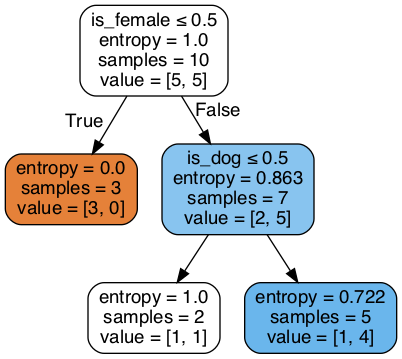

In [95]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

The entropy of the whole dataset is given by:

$\large E = -\Sigma^n_i p_i\log_2(p_i)$,

where $p_i$ is the probability of belonging to the $i$th group, where $n$ is the number of groups (i.e. target values).

**Entropy will always be between 0 and 1. The closer to 1, the more disordered your group.**

<img src='./img/Entropy_mapped.png' width=600/>

To repeat, in the present case we have only two groups of interest: adoption and no adoption.

5 out of 10 were adopted and 5 out of 10 were not adopted, so **these are the relevant probabilities** for our calculation of entropy.

So our entropy for the sample above is:

$-0.5*\log_2(0.5) -0.5*\log_2(0.5)$.

Let's use the ``numpy's`` `log2()` function to calculate this:

Now, let's calculate the entropy of the training set.

In [97]:
values, counts = None, None


p_0 = None
p_1 = None

def entropy(p_0,p_1):
    
    "entropy of a dataset with binary outcomes"
    
    pass

To calculate the entropy of a *split*, we're going to want to calculate the entropy of each of the groups made by the split, and then calculate a weighted average of those groups' entropies––weighted, that is, by the size of the groups. Let's calculate the entropy of the split produced by our "is our animal a dog" question:

Group 1 (not a dog): adoption, no adoption, no adoption



$E_{g1} = - 2/3 * \log_2(2/3) - 1/3 * \log_2(1/3)$. 

Group 2: adoption, adoption, adoption, no adoption, no adoption, no adoption, adoption  
$E_{g2} = -\frac{3}{7} * \log_2\left(\frac{3}{7}\right) - \frac{4}{7} * \log_2\left(\frac{4}{7}\right)$.




In [99]:
Eg1 = (-2/3)*np.log2(2/3) - (1/3)*np.log2(1/3)
print(Eg1)

Eg2 =(-3/7)*np.log2(3/7) - (4/7)*np.log2(4/7)
print(Eg2)

0.9182958340544896
0.9852281360342515


Now weight those by the probability of each group, and sum them, to find the entropy of the split:

In [103]:
pg1 = (3/10) * Eg1
pg2 = (7/10) * Eg2

E_split_d = pg1 + pg2
E_split_d

0.965148445440323

Compare that to the male/female question:

In [104]:
# In Group 1: no adoption, no adoption, no adoption  

Egm =  - (3/3)*np.log2(3/3) # This is a pure split, entropy is 0
print(Egm)

# In Group 2, I have: adoption, adoption, adoption, adoption, no adoption, no adoption, adoption

Egf =(-2/7)*np.log2(2/7) - (5/7)*np.log2(5/7) 
print(Egf)



-0.0
0.863120568566631


Weighted sum

In [105]:
pgm = Egm * 3/10
pgf = Egf * 7/10

E_split_f = pgm + pgf
E_split_f

0.6041843979966417

For a given split, the **information gain** is simply the entropy of the parent group less the entropy of the split.

In [106]:
total_entropy_sample = (-5/10)*np.log2(5/10) - (5/10) * np.log2(5/10)


# Information gain, dog or cat

ig_d = total_entropy_sample - E_split_d
print(f"Information gain dog/cat: {ig_d}")

ig_f = total_entropy_sample - E_split_f
print(f"Information gain male/female: {ig_f}")



Information gain dog/cat: 0.034851554559677034
Information gain male/female: 0.3958156020033583


For a given parent, then, we maximize our model's performance by *minimizing* the split's entropy.

What we'd like to do then is:

1. to look at the entropies of all possible splits, and
2. to choose the split with the lowest entropy.

In practice there are far too many splits for it to be practical for a person to calculate all these different entropies ...

... but we can make computers do these calculations for us!

## Gini Impurity

An alternative metric to entropy comes from the work of Corrado Gini. The Gini Impurity is defined as:

$\large G = 1 - \Sigma_ip_i^2$, or, equivalently, $\large G = \Sigma_ip_i(1-p_i)$.

where, again, $p_i$ is the probability of belonging to the $i$th group.

**Gini Impurity will always be between 0 and 0.5. The closer to 0.5, the more disordered your group.**

# Pairs (7 minutes)

Below, you will find a new Decision Tree Classifier with the hyperparameter *'criterion'* set to *'gini'*.

The decision tree is printed out just below.

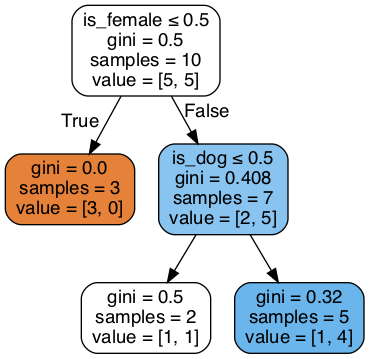

In [107]:
dt_gini = DecisionTreeClassifier(criterion='gini')

X = example_sample.drop('adoption', axis=1)
y = example_sample.adoption
dt_gini = dt_gini.fit(X,y)

dot_data = StringIO()
export_graphviz(dt_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
               feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [108]:
# In pairs, calculate the gini score for each split: is_female, is_dog. 

gini_is_female = None
gini_is_male = None
gini_total_malefemale = None

gini_is_dog = None
gini_is_cat = None
gini_total_cat_dog = None



# Caveat


As found in *Introduction to Data Mining* by Tan et. al:

`Studies have shown that the choice of impurity measure has little effect on the performance of decision tree induction algorithms. This is because many impurity measures are quite consistent with each other [...]. Indeed, the strategy used to prune the tree has a greater impact on the final tree than the choice of impurity measure.`

# 4. Issues with Decision Trees
  
  - They are prone to overfitting.
  - They are highly dependent on the training data: small differences in training sets produce completely different trees.
  - They are susceptible to class imbalance.
  - They are greedy.
     



### Decision trees are prone to overfitting

Let's add back in age_in_days and refit the tree


In [110]:
animal_shelter.dropna(subset=['age_upon_outcome'], inplace=True )
df = preprocess_df(animal_shelter)
df.shape

(903, 4)

In [111]:

X = df.drop(['adoption'], axis=1)
y = df.adoption
X.head()

is_dog  age_in_days  is_female
Unnamed: 0                                
1                0           46          1
2                0          136          1
3                1          575          1
5                0          748          1
6                0           75          0

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, random_state=42, test_size=.25)

In [117]:
dt = DecisionTreeClassifier()

dt.fit(X_t,y_t)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

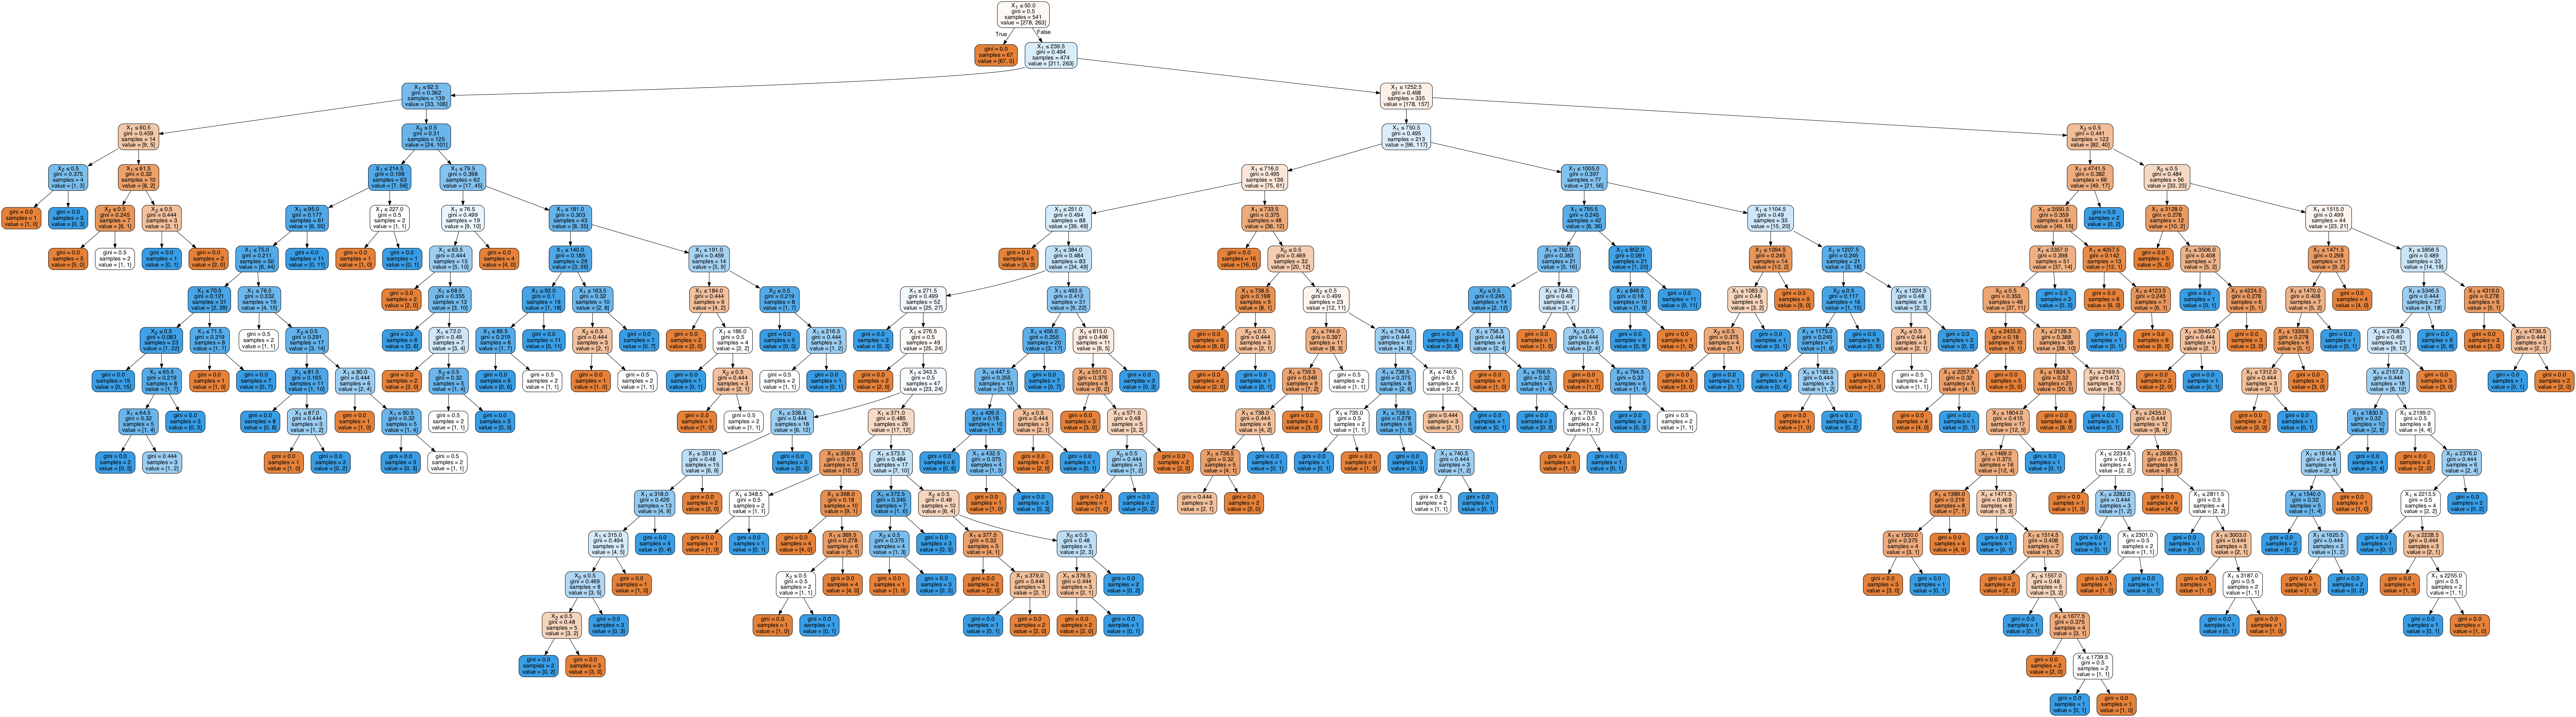

In [118]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

That is a good visual to go represent an overfit tree.  Let's look at the accuracy.

In [119]:
# That is massive
dt.score(X_t,y_t)

0.9722735674676525

That super high accuracy score is a telltale sign of an overfit model.

In [120]:
# That's a bit dropoff
dt.score(X_val, y_val)

0.6850828729281768

### Bias-Variance with Decision Trees

The CART algorithm will repeatedly partition data into smaller and smaller subsets until those final subsets are homogeneous in terms of the outcome variable. In practice this often means that the final subsets (known as the leaves of the tree) each consist of only one or a few data points. 

This results in low-bias, high variance trees.


## Stopping Criterion - Pruning Parameters


The recursive binary splitting procedure described above needs to know when to stop splitting as it works its way down the tree with the training data.

**min_samples_leaf:**  The most common stopping procedure is to use a minimum count on the number of training instances assigned to each leaf node. If the count is less than some minimum then the split is not accepted and the node is taken as a final leaf node.

**max_leaf_nodes:** 
Reduce the number of leaf nodes

**max_depth:**
Reduce the depth of the tree to build a generalized tree
Set the depth of the tree to 3, 5, 10 depending after verification on test data

**min_impurity_decrease :**
A node will split if its impurity is above the threshold, otherwise it is a leaf.


Let's try limiting the depth:

In [121]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_t, y_t)
print(dt.score(X_t, y_t))
print(dt.score(X_val, y_val))


0.7486136783733827
0.6685082872928176


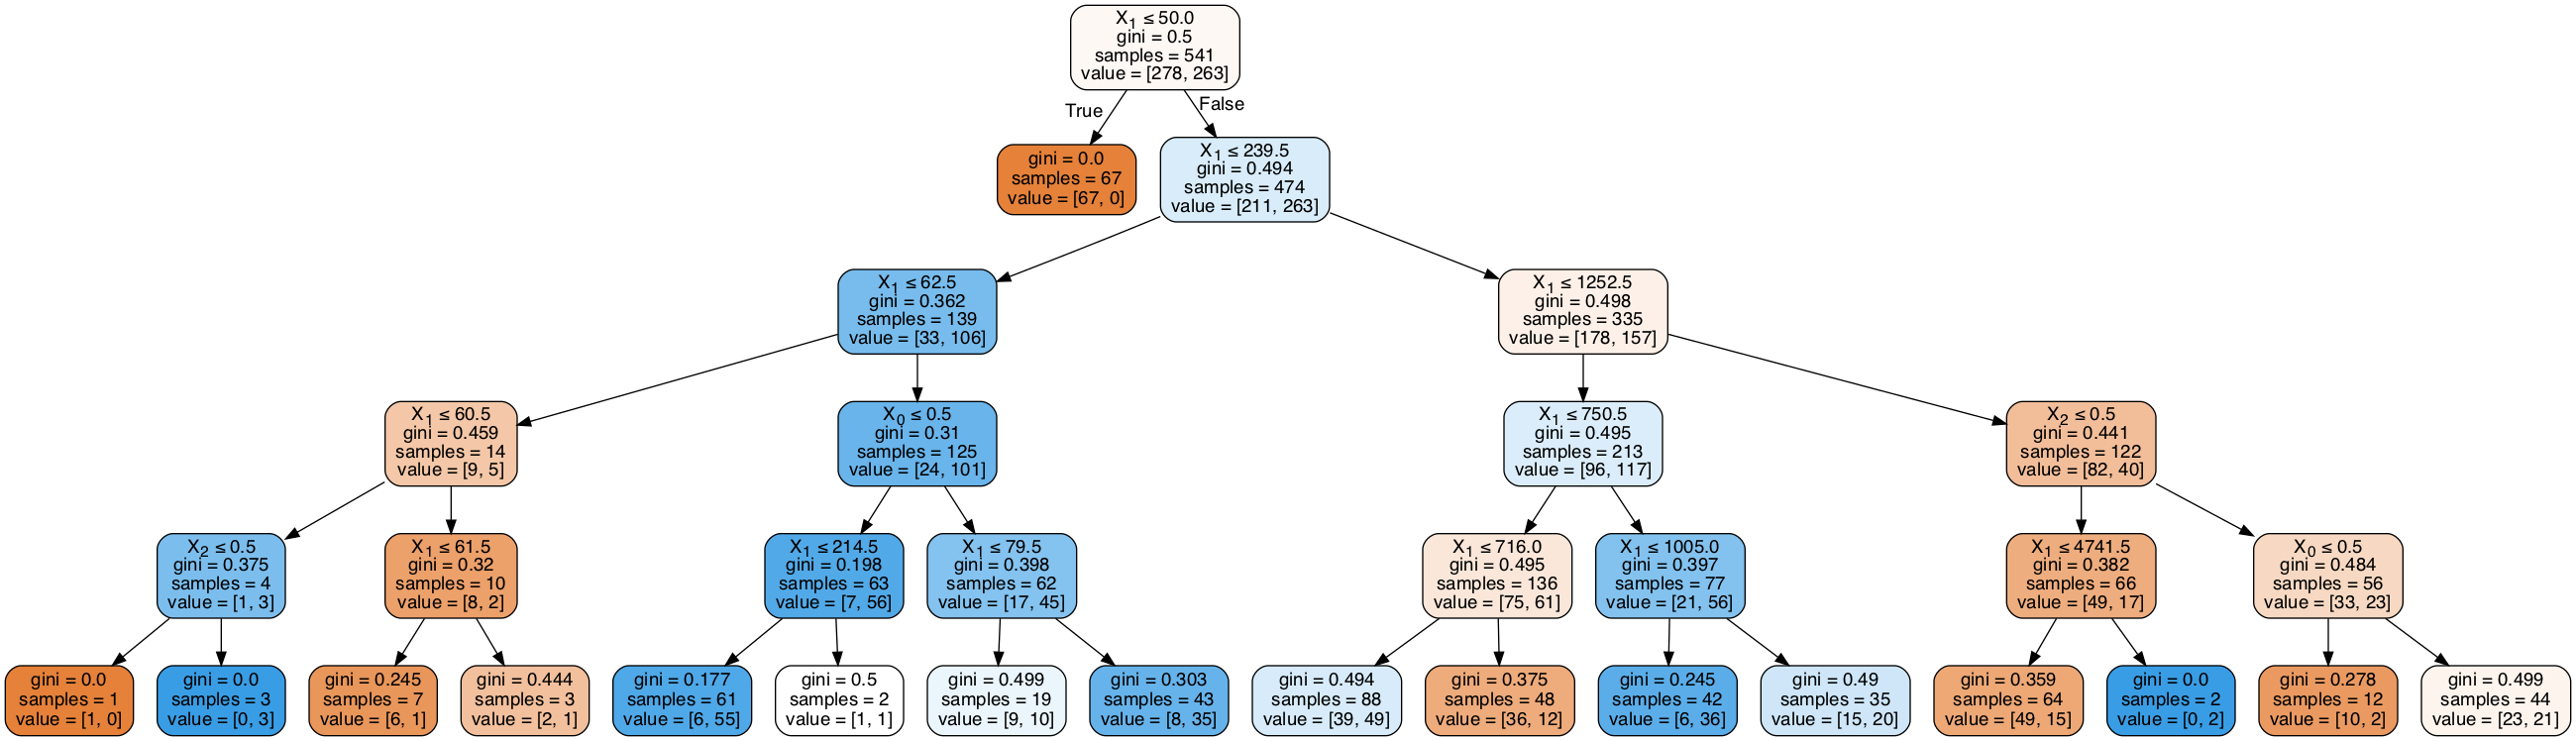

In [122]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Let's try limiting minimum samples per leaf:

In [123]:
dt = DecisionTreeClassifier(min_samples_leaf=10)
dt.fit(X_t, y_t)
print(dt.score(X_t, y_t))
print(dt.score(X_val, y_val))

0.7948243992606284
0.7016574585635359


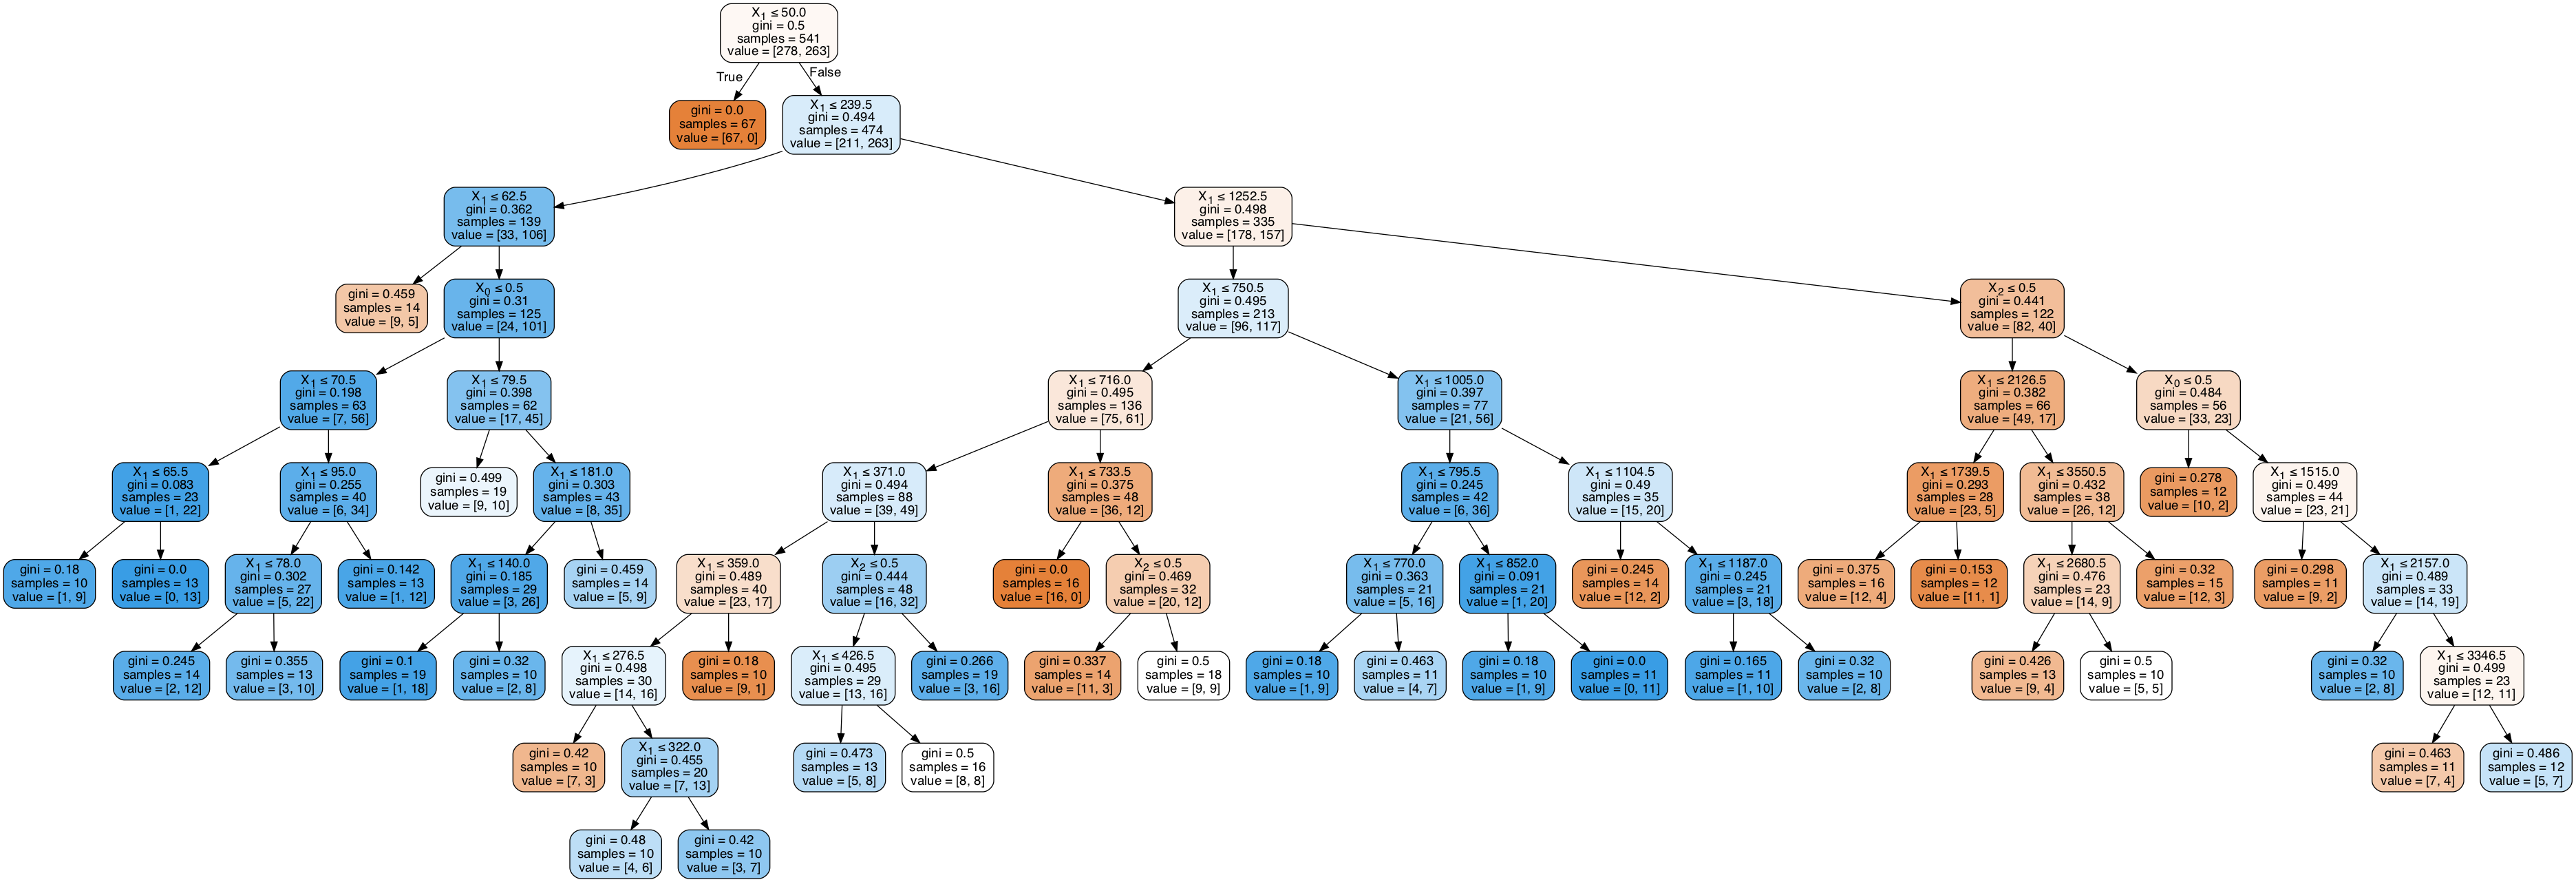

In [124]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [125]:
dt = DecisionTreeClassifier(max_leaf_nodes=10)
dt.fit(X_t, y_t)
print(dt.score(X_t, y_t))
print(dt.score(X_val, y_val))

0.767097966728281
0.6685082872928176


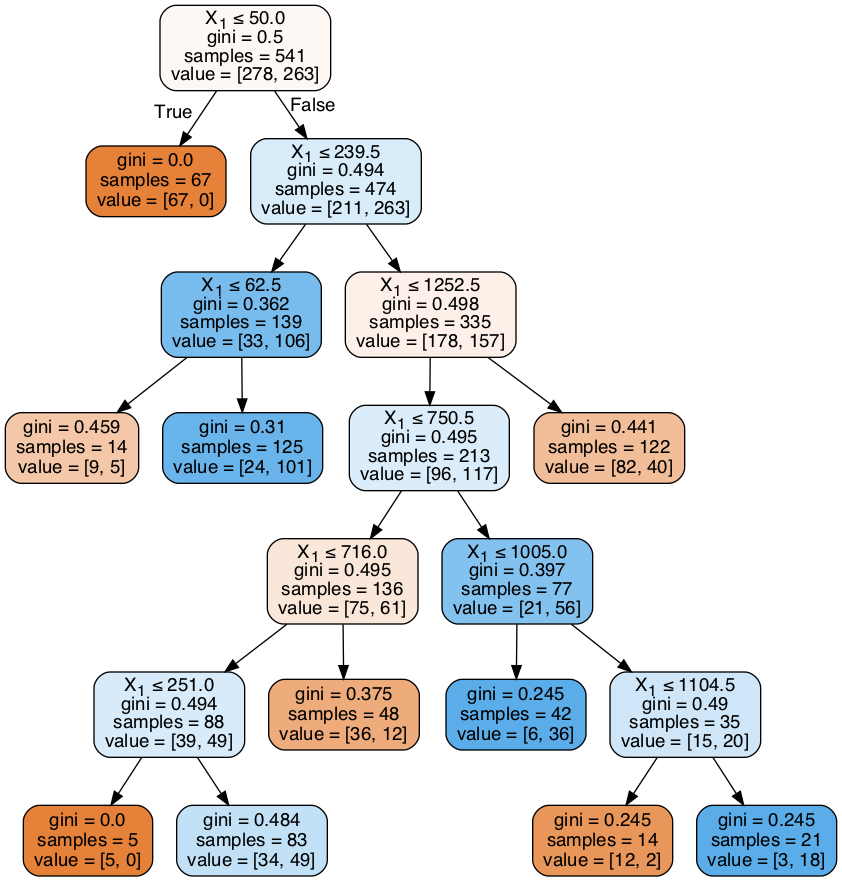

In [126]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Pairs (7 minutes)

Search for the optimal combination of hyperparamters w.r.t the accuracy of the validation set. 

Report back best parameters as well as validation score.




In [127]:
# Your code here

# Grid Search

That is a lot of guess work.  Luckily, we have a tool called Grid Search which will make our lives a lot easier.  

Grid search takes a dictionary of paramater key words and values as an argument, iterates through all the possible combinations of those parameters and cross validates each model, then returns the parameter combination which performs best on the validation set.

While grid search is very convenient, it requires knowledge of what parameters each type of model requires as well as what values those paramters accept.  

It can also take a really long time.

In [128]:
param_grid = [
  {'criterion': ['gini', 'entropy'], 
   'max_leaf_nodes': list(range(2,20)),
   'max_depth': list(range(2,10)),
   'min_impurity_decrease': np.linspace(0,1,10)} 
             ]

In [129]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=4, 
                  return_train_score=True, refit=True)
gs.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='de...
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth':

In [130]:
gs.__dict__.keys()

dict_keys(['scoring', 'estimator', 'n_jobs', 'iid', 'refit', 'cv', 'verbose', 'pre_dispatch', 'error_score', 'return_train_score', 'param_grid', 'multimetric_', 'best_index_', 'best_score_', 'best_params_', 'best_estimator_', 'refit_time_', 'scorer_', 'cv_results_', 'n_splits_'])

In [131]:
gs.best_score_

0.7313228974831185

In [132]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_leaf_nodes': 17,
 'min_impurity_decrease': 0.0}

In [133]:
gs.best_estimator_.score(X_test, y_test)

0.7016574585635359

## Greediness

Decision trees will always split on the features with the most advantageous split. 

This could obscure valuable information held in those variables.  

For example, just for fun, let's dummy all of the colors of the animals.



In [62]:
animal_shelter = pd.read_csv('data/austin.csv')
animal_shelter.set_index('Unnamed: 0', inplace=True)
animal_shelter.dropna(subset=['age_upon_outcome'], inplace=True )
color = animal_shelter.color
df = preprocess_df(animal_shelter)

# Add color back in to the dataset
df['color'] = color
df.color.value_counts()

Black/White            96
Black                  73
Brown/White            43
White                  38
Brown Tabby            38
                       ..
Black/Brown Brindle     1
Chocolate/Tan           1
Apricot                 1
Sable/Black             1
White/Cream Tabby       1
Name: color, Length: 112, dtype: int64

The decision tree very rarely uses color as a split. Most often, age in days is chosen as the optimal split.  

In [63]:
# Let's consolodate into Black/White/Other

def color_selector(color):
    if color == 'Black':
        return 'Black'
    elif color == 'White':
        return 'White'
    else:
        return 'other'
    
df['color'] = df['color'].apply(color_selector)
df.color.value_counts()

other    792
Black     73
White     38
Name: color, dtype: int64

In [69]:
X = df.drop('adoption', axis=1)
y = df.adoption

X = X.join(pd.get_dummies(X.color))
X.drop('color', axis=1, inplace=True)
X.head()

is_dog  age_in_days  is_female  Black  White  other
Unnamed: 0                                                     
1                0           46          1      0      0      1
2                0          136          1      0      0      1
3                1          575          1      0      0      1
5                0          748          1      0      0      1
6                0           75          0      0      0      1

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

param_grid = [
  {'criterion': ['gini', 'entropy'], 
   'max_leaf_nodes': list(range(2,20)),
   'max_depth': list(range(2,10)),} 
             ]

from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=4, 
                  return_train_score=True, refit=True)
gs.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                  

In [71]:
gs.best_score_

0.7299340085942296

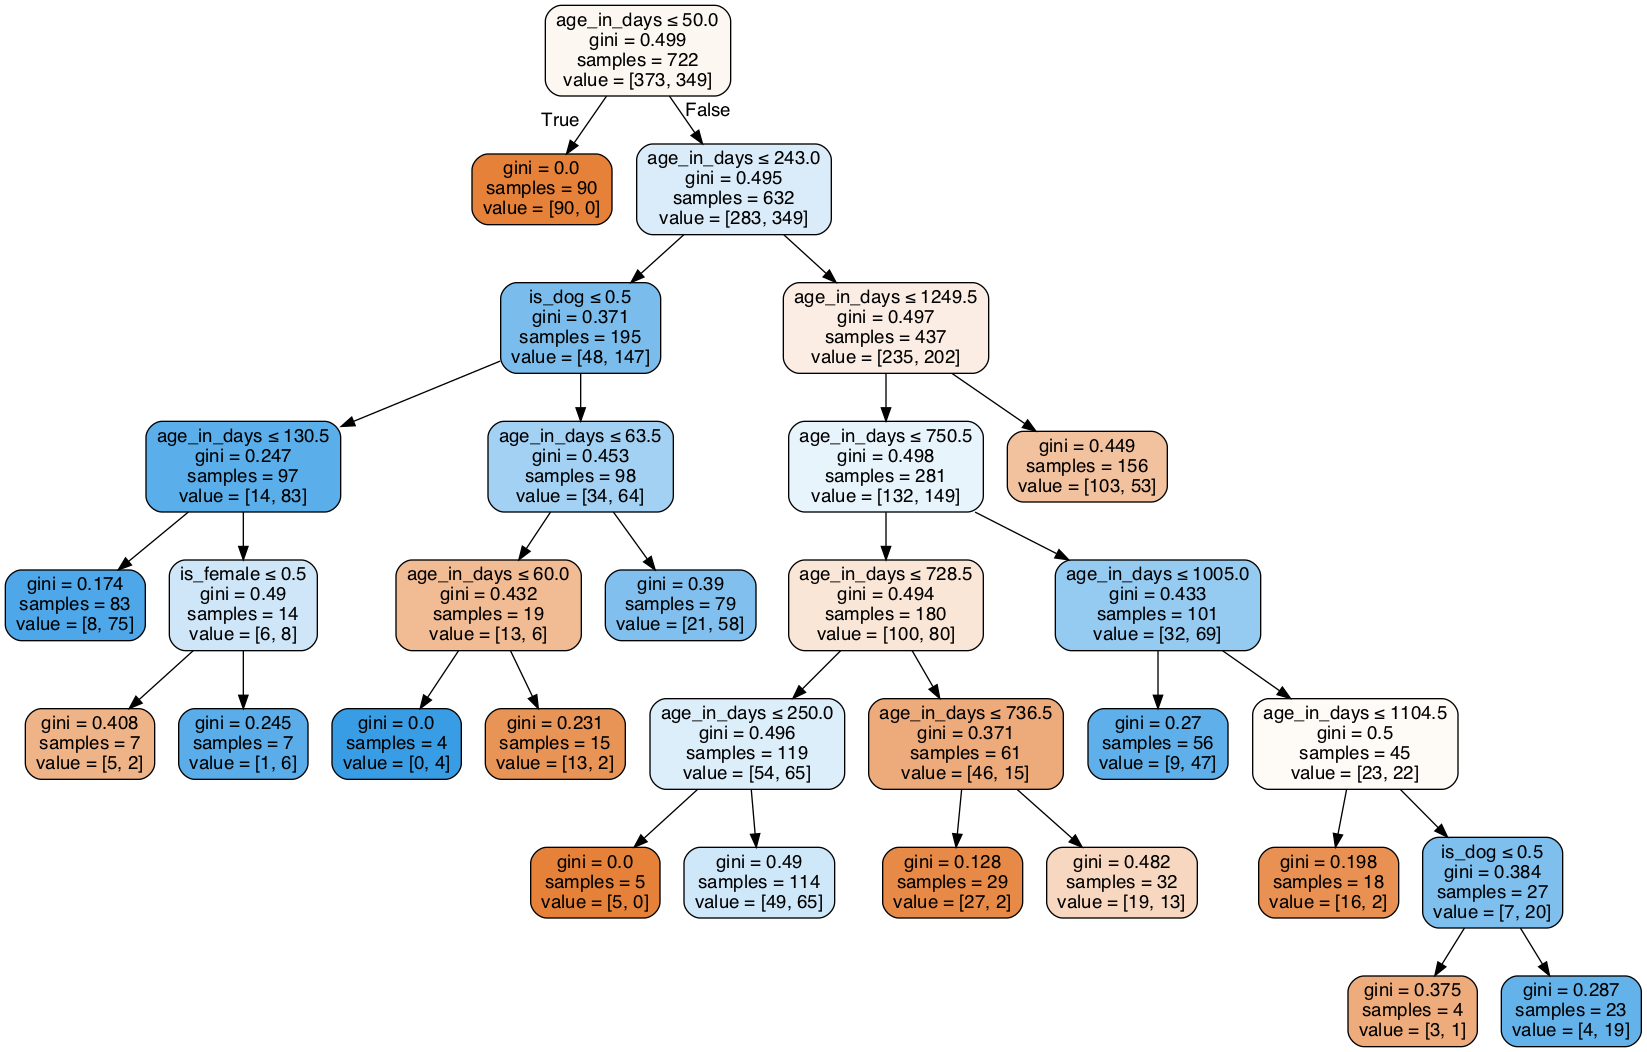

In [72]:
dot_data = StringIO()
export_graphviz(gs.best_estimator_, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


## Feature Importances

The fitted tree has an attribute called `ct.feature_importances_`. What does this mean? Roughly, the importance (or "Gini importance") of a feature is a sort of weighted average of the impurity decrease at internal nodes that make use of the feature. The weighting comes from the number of samples that depend on the relevant nodes.

> The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance. [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)

In [73]:
for fi, feature in zip(gs.best_estimator_.feature_importances_, X_train.columns):
    print(fi, feature)


0.04623807055011041 is_dog
0.9368897444155458 age_in_days
0.016872185034343727 is_female
0.0 Black
0.0 White
0.0 other


More on feature importances [here](https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3)

# Conclusions

Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. The decision tree is a non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy.

#### Pros
- Decision trees are easy to interpret and visualize.
- They can easily capture non-linear patterns.
- They require little data preprocessing from the user, for example, there is no need to normalize columns.
- They can be used for feature engineering such as predicting missing values, suitable for variable selection.
- Decision trees have no assumptions about distribution because of the non-parametric nature of the algorithm.

#### Cons
- Sensitive to noisy data. It can overfit noisy data.
- The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
- Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.